In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df = pd.read_csv('arabicLyrics.csv')

In [3]:
df.head()

,songID,Singer,SongTitle,SongWriter,Composer,LyricsOrder,Lyrics,SingerNationality,SongDialect
0,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,2,اروح لاحبابي والاقي الفرح ساكن عينهم,Morocco,Meghribi
1,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,3,ابتسم لافراحهم وانا من الهم احترق,Morocco,Meghribi
2,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,4,واسأل جروحي من ترى حس بعذابي منهم,Morocco,Meghribi
3,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,5,وبالحقيقه انصدم محدن معه همي فرق,Morocco,Meghribi
4,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,6,دورت في كل الوجيه حسيت غربه بينهم,Morocco,Meghribi


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527896 entries, 0 to 527895
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   songID             527896 non-null  int64 
 1   Singer             527896 non-null  object
 2   SongTitle          527896 non-null  object
 3   SongWriter         527821 non-null  object
 4   Composer           527896 non-null  object
 5   LyricsOrder        527896 non-null  int64 
 6   Lyrics             527896 non-null  object
 7   SingerNationality  527896 non-null  object
 8   SongDialect        527896 non-null  object
dtypes: int64(2), object(7)
memory usage: 36.2+ MB


In [5]:
df.nunique()

songID                30072
Singer                 1755
SongTitle             25799
SongWriter             3823
Composer               2465
LyricsOrder             941
Lyrics               411777
SingerNationality        18
SongDialect               6
dtype: int64

In [6]:
#percentage of missing values
(df.isna().sum()/len(df)*100).round(3)

songID               0.000
Singer               0.000
SongTitle            0.000
SongWriter           0.014
Composer             0.000
LyricsOrder          0.000
Lyrics               0.000
SingerNationality    0.000
SongDialect          0.000
dtype: float64

In [7]:
# we only have 6 songs with missing songWriter
df[df.isnull().any(axis=1)].nunique()

songID                6
Singer                2
SongTitle             6
SongWriter            0
Composer              3
LyricsOrder          23
Lyrics               59
SingerNationality     1
SongDialect           1
dtype: int64

In [8]:
#43941
df[df["LyricsOrder"]>200]

,songID,Singer,SongTitle,SongWriter,Composer,LyricsOrder,Lyrics,SingerNationality,SongDialect
43941,18598,الشيخ امام,في الليل,احمد فؤاد نجم,غير معروف,201,و عيون النور,Egypt,Egyptian
43942,18598,الشيخ امام,في الليل,احمد فؤاد نجم,غير معروف,202,سهرانة بتنعس ع العمدان,Egypt,Egyptian
43943,18598,الشيخ امام,في الليل,احمد فؤاد نجم,غير معروف,203,و الكون ملفوف,Egypt,Egyptian
43944,18598,الشيخ امام,في الليل,احمد فؤاد نجم,غير معروف,204,بعباية نسجها الليل بالخوف,Egypt,Egyptian
43945,18598,الشيخ امام,في الليل,احمد فؤاد نجم,غير معروف,205,و ف بحر الظلمة,Egypt,Egyptian
...,...,...,...,...,...,...,...,...,...
424631,14191,محمد قنديل,سمــــاح,غير معروف,غير معروف,937,يا اهل السمـــــاح,Egypt,Egyptian
424632,14191,محمد قنديل,سمــــاح,غير معروف,غير معروف,938,لوم الهوي جارح,Egypt,Egyptian
424633,14191,محمد قنديل,سمــــاح,غير معروف,غير معروف,939,اصــل السمــــــاح,Egypt,Egyptian
424634,14191,محمد قنديل,سمــــاح,غير معروف,غير معروف,940,طبــع المــــــــلاح,Egypt,Egyptian


In [9]:
df = df.replace("غيرمعروف",np.NAN)
df = df.replace("غير معروف",np.NAN)
print((df.isna().sum()/len(df)*100).round(3))

songID                0.000
Singer                0.000
SongTitle             0.000
SongWriter           46.222
Composer             48.251
LyricsOrder           0.000
Lyrics                0.000
SingerNationality     0.000
SongDialect           0.000
dtype: float64


In [10]:
df = df.drop(['SongTitle','SongWriter','Composer','SingerNationality'],axis=1)

In [11]:
df.head()

,songID,Singer,LyricsOrder,Lyrics,SongDialect
0,1537,ابتسام,2,اروح لاحبابي والاقي الفرح ساكن عينهم,Meghribi
1,1537,ابتسام,3,ابتسم لافراحهم وانا من الهم احترق,Meghribi
2,1537,ابتسام,4,واسأل جروحي من ترى حس بعذابي منهم,Meghribi
3,1537,ابتسام,5,وبالحقيقه انصدم محدن معه همي فرق,Meghribi
4,1537,ابتسام,6,دورت في كل الوجيه حسيت غربه بينهم,Meghribi


In [12]:
print("Number of songs:", df["songID"].nunique())
print("Available Dialects: ",df["SongDialect"].unique())
song_dialect_count = df.groupby(['SongDialect'])['songID'].nunique()
song_dialect_count

Number of songs: 30072
Available Dialects:  ['Meghribi' 'Gulf' 'Iraqi' 'Sudan' 'Egyptian' 'Levantine']


SongDialect
Egyptian     7265
Gulf         9484
Iraqi        3438
Levantine    6016
Meghribi     1207
Sudan        2662
Name: songID, dtype: int64

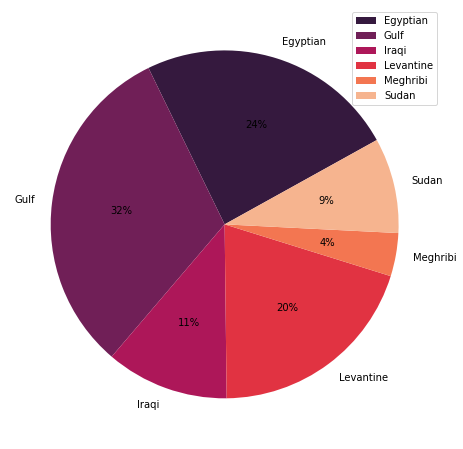

In [13]:
colors = sns.color_palette('rocket')
plt.figure(figsize = (8,8),facecolor='white')
plt.pie(song_dialect_count, labels = np.sort(df["SongDialect"].unique()),colors= colors, autopct='%.0f%%',startangle=29)
plt.legend()
plt.show()

In [22]:
import re
from nltk.corpus import stopwords
from bidi.algorithm import get_display
from wordcloud import WordCloud
import arabic_reshaper 

def remove_stopwords(text):
    stoppwords = set(stopwords.words('arabic'))
    stoppwords.add('\u2066')
    stoppwords.add('\u2069')
    text = re.sub(r'\b(' + '|'.join(stoppwords) + r')\b', '', text)    
    return text

def generate_arabic_wcloud(SongDialect : str):
    all_sentences = ' '.join(df[df["SongDialect"]==SongDialect]['Lyrics'])
    data = remove_stopwords(all_sentences)
    data = arabic_reshaper.reshape(data)
    data = get_display(data)
    WordCloudd = WordCloud(font_path='./NotoNaskhArabic-Regular.ttf',background_color='white',
                  mode='RGB', width=4000, height=4000,).generate(data)
    plt.figure(figsize=(12,12))
    plt.title(f'{SongDialect} songs WordCloud')
    plt.imshow(WordCloudd)
    plt.axis("off")
    
    plt.show()

In [ ]:
['Meghribi' 'Gulf' 'Iraqi' 'Sudan' 'Egyptian' 'Levantine']

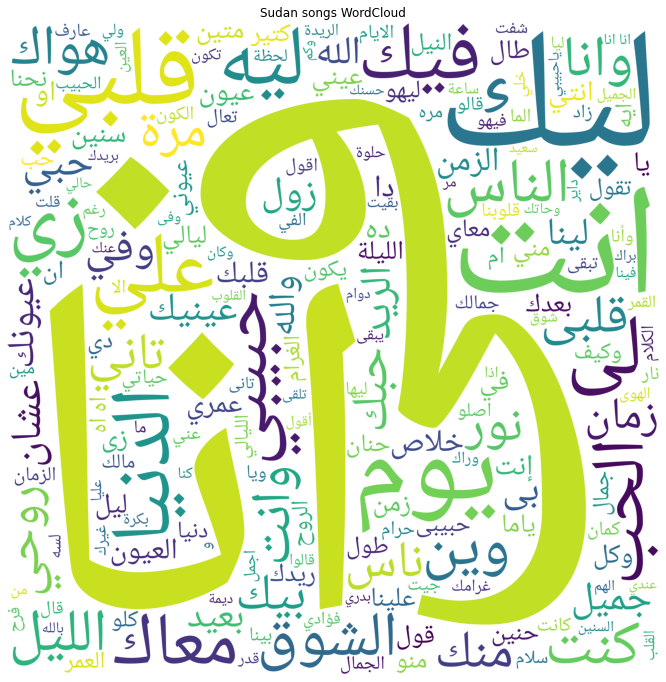

In [23]:
generate_arabic_wcloud("Sudan")

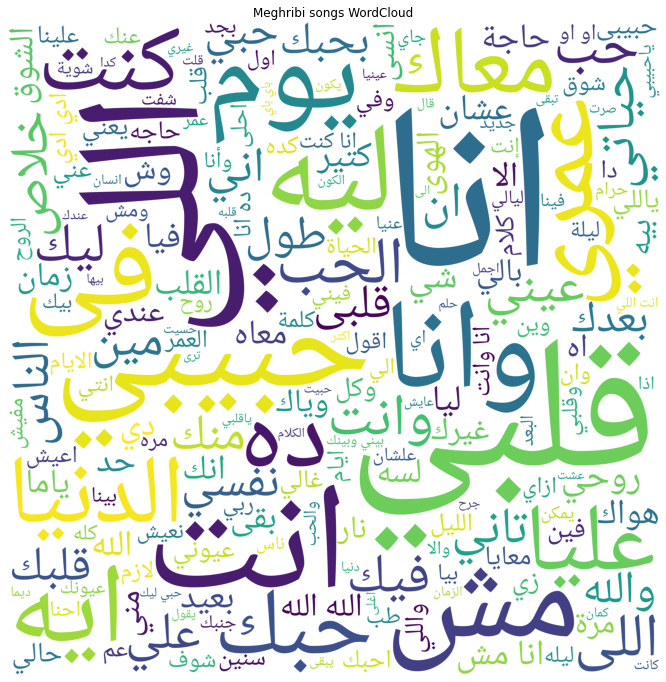

In [24]:
generate_arabic_wcloud("Meghribi")

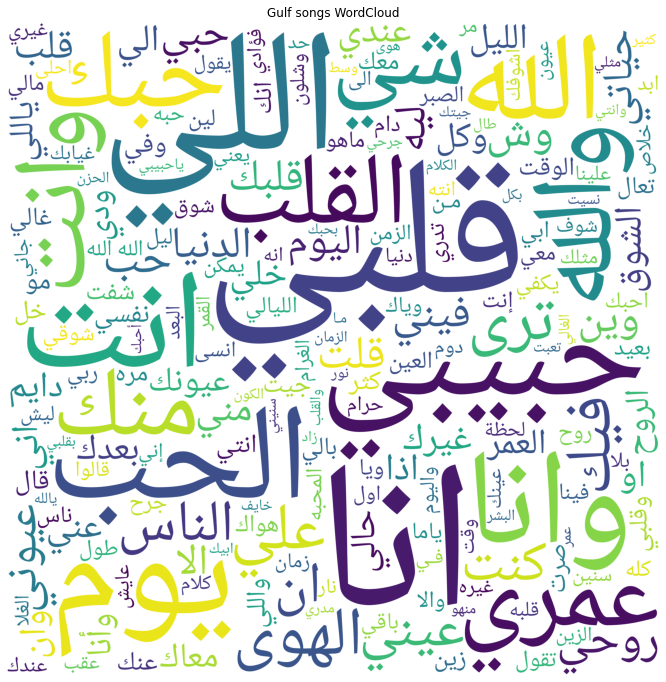

In [25]:
generate_arabic_wcloud("Gulf")

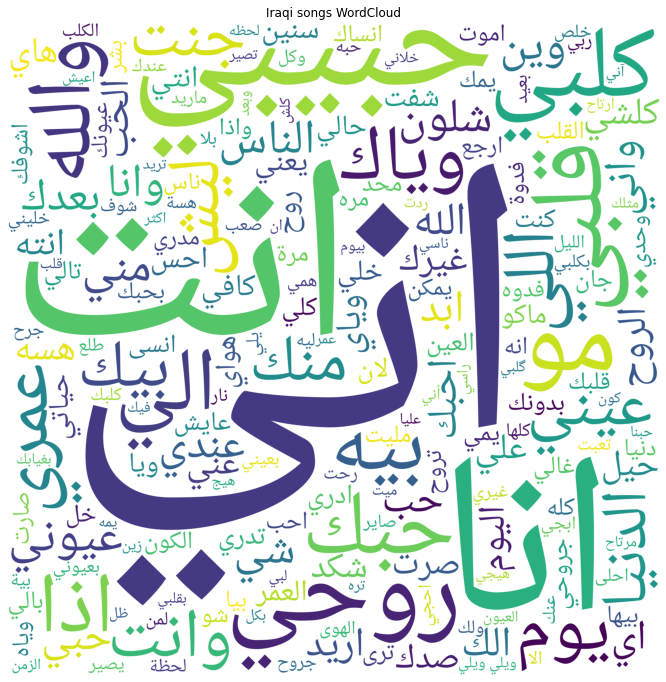

In [26]:
generate_arabic_wcloud("Iraqi")

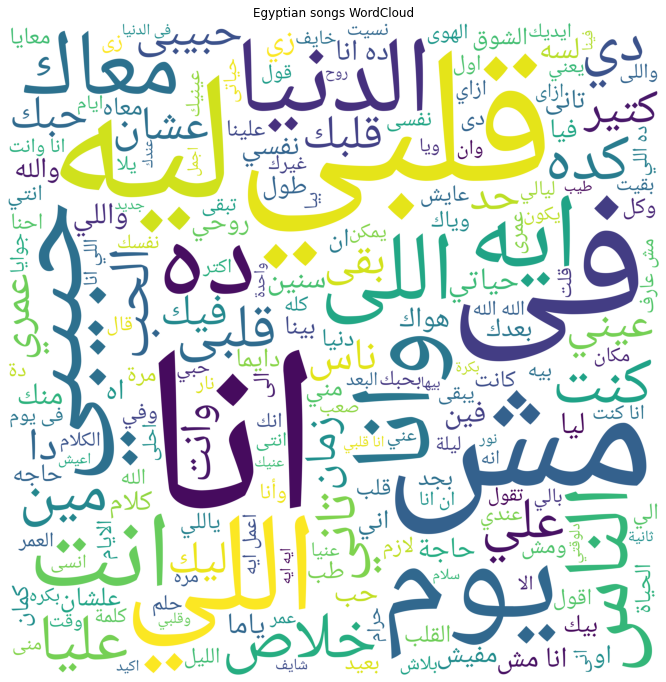

In [27]:
generate_arabic_wcloud("Egyptian")

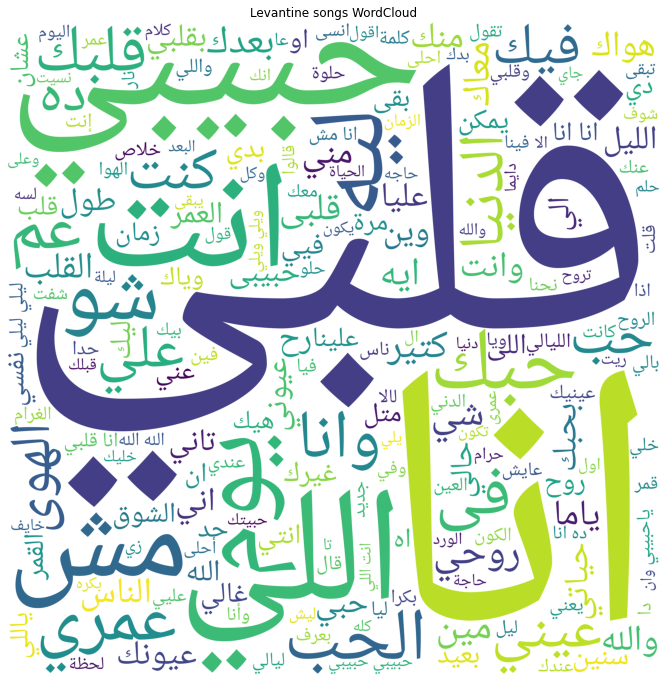

In [28]:
generate_arabic_wcloud("Levantine")